## Esercitazione 6 - 26 Marzo 2024

In [1]:
import numpy as np
import sympy as sym

import numpy.linalg as npl
import matplotlib.pyplot as plt
import math

import sys, os
sys.path.append(os.path.abspath('../Scheletri'))

# Step 2: Import the functions or classes from Schel_FULL
import Schel_FULL as sf


$$
\begin{align}
&1 : e^{-x} - (x + 1) \\
&2:  \frac{\log(x + 3)}{\log(2)} - 2\\
&3: \sqrt{x} - \frac{x^2}{4} \\
\end{align}
$$

 Confrontare i metodi sopra implementati nei casi seguenti:

- f(x) = exp(−x) − (x + 1) in [−1, 2] con x0 = −0.5, x−1 = −0.3, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=0);
- f(x) = log2(x + 3) − 2 in [−1, 2] con x0 = −0.5, x−1 = 0.5, tolx = 1.e − 12, tolf = 1.e − 12, (soluzione esatta alfa=1);
- f(x) =sqrt(x)-(x^2)/4 in [1, 3] con x0 = 1.8, x−1 = 1.5, tolx = 1.e − 12, tolf =1.e − 12, (soluzione esatta alfa=2**(4/3))

Mostrare in un grafico in scala semilogaritmica sulle ordinate (comando semilogy) l’andamento di ek = |xk − α|, k = 1, ..., nit, sapendo che α = 0, 1, 2**(4/3) nei
tre casi.
Calcolare infine, a partire dai valori di {xk} con k sufficientemente grande, la stima dell’ordine di convergenza p come

p= ln (|x_{k+1}-x_k|/|x_k-x_{k-1}|)/ln (|x_k-x_{k-1}|/|x_{k-1}-x_{k-2}|)

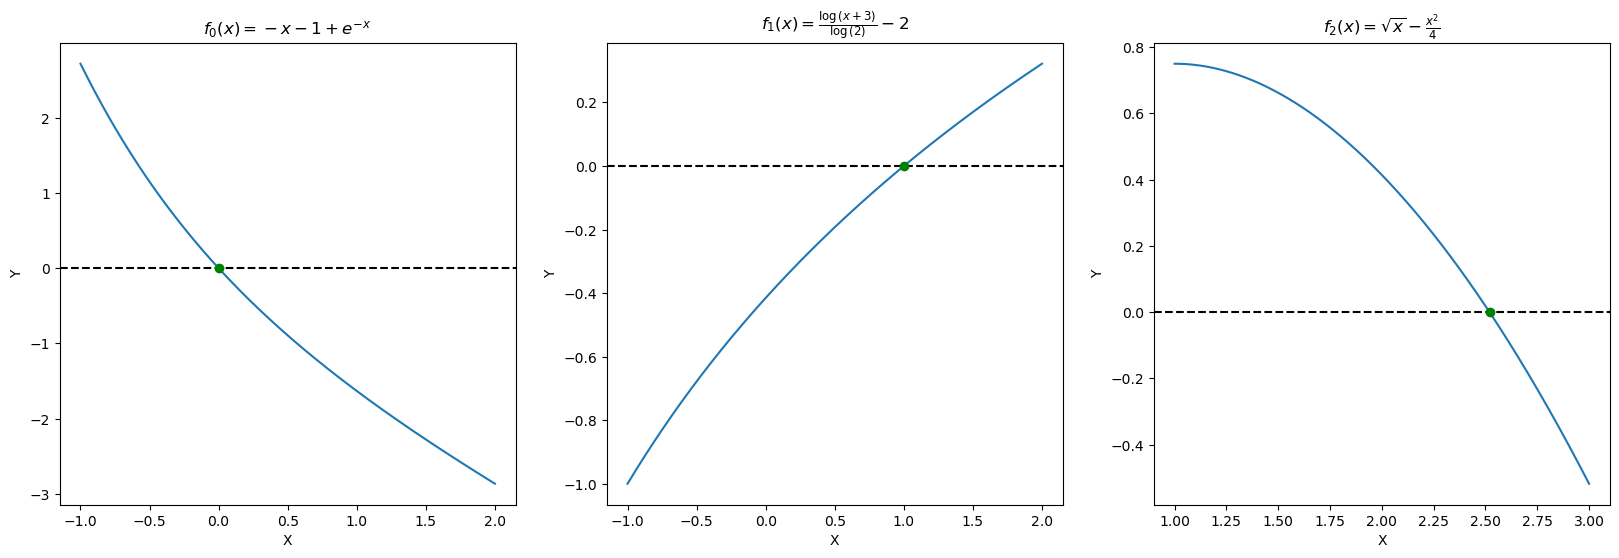

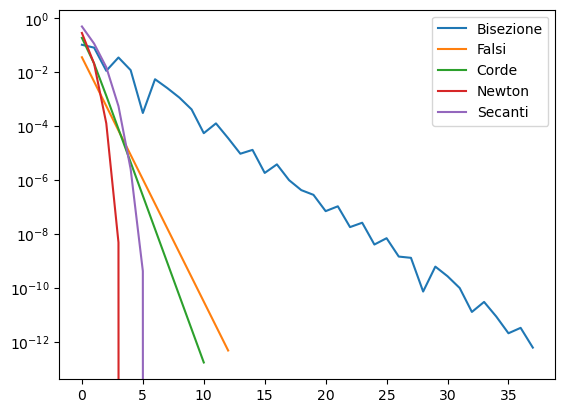

In [20]:
x = sym.symbols('x')

f1 = sym.exp(-x) - (x + 1)
f2 = sym.log(x + 3)/sym.log(2) - 2
f3 = sym.sqrt(x) - (x**2) / 4

data = {
    f1: {'lambda': sym.lambdify(x, f1, np), 'interval': [-1, 2],'extremes': (-0.5, 1), 'x0': -0.5, 'xm1': -0.3, 'tolx': 1e-12, 'tolf': 1e-12, 'alfa': 0},
    f2: {'lambda': sym.lambdify(x, f2, np),'interval': [-1, 2], 'extremes': (0, 1.5),'x0': -0.5, 'xm1': 0.5, 'tolx': 1e-12, 'tolf': 1e-12, 'alfa': 1},
    f3: {'lambda': sym.lambdify(x, f3, np),'interval': [1, 3],'extremes': (2.25, 3), 'x0': 1.8, 'xm1': 1.5, 'tolx': 1e-12, 'tolf': 1e-12, 'alfa': 2**(4/3)}
}

solutions = {
    'Bisezione': {},
    'Falsi': {},
    'Corde': {},
    'Newton': {},
    'Secanti': {}
}

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
for i, f_sym in enumerate(data) :
    maxit = 1000
    f = data[f_sym]['lambda']
    fd = sym.lambdify(x, sym.diff(f_sym, x), np)
    x0 = data[f_sym]['x0']
    xm1 = data[f_sym]['xm1']
    alfa = data[f_sym]['alfa']
    tolx, tolf = data[f_sym]['tolx'], data[f_sym]['tolf']
    a, b = data[f_sym]['extremes'][0], data[f_sym]['extremes'][1]
    m = (f(b)-f(a))/(b-a)
    lims = data[f_sym]['interval'][0], data[f_sym]['interval'][1]
    xx = np.linspace(lims[0], lims[1], 1000)

    sol_BIS, numit_BIS, vec_sol_BIS = sf.metodo_bisezione(f, a, b, tolx, tolf)
    solutions['Bisezione']['Numit'] = numit_BIS
    solutions['Bisezione']['Vec_err'] = np.abs(np.array(vec_sol_BIS) - alfa)
    sol_FALSI, numit_FALSI, vec_sol_FALSI = sf.falsi(f, a, b, maxit, tolx, tolf)
    solutions['Falsi']['Numit'] = numit_FALSI
    solutions['Falsi']['Vec_err'] = np.abs(np.array(vec_sol_FALSI) - alfa)
    sol_CORDE, numit_CORDE, vec_sol_CORDE = sf.corde(f, m, x0, tolx, tolf, maxit)
    solutions['Corde']['Numit'] = numit_CORDE
    solutions['Corde']['Vec_err'] = np.abs(np.array(vec_sol_CORDE) - alfa)
    sol_NT, numit_NT, vec_sol_NT = sf.newton(f, fd, x0, tolx, tolf, maxit)
    solutions['Newton']['Numit'] = numit_NT
    solutions['Newton']['Vec_err'] = np.abs(np.array(vec_sol_NT) - alfa)
    sol_SEC, numit_SEC, vec_sol_SEC = sf.secanti(f, xm1, x0, tolx, tolf, maxit)
    solutions['Secanti']['Numit'] = numit_SEC
    solutions['Secanti']['Vec_err'] = np.abs(np.array(vec_sol_SEC) - alfa)

    ax[i].set_title(f'$f_{i}(x) = {sym.latex(f_sym)}$')
    ax[i].plot(xx, f(xx))
    ax[i].axhline(0, color = 'black', linestyle = '--')
    ax[i].set_xlabel('X')
    ax[i].set_ylabel('Y')
    ax[i].plot(sol_NT, f(sol_NT), 'go')

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
for method in solutions:
    ax.semilogy(range(solutions[method]['Numit']),  solutions[method]['Vec_err'], label = method)
    ax.legend()




## Esercizio 2
Utilizzare il metodo di Newton e il metodo di Newton modificato per il calcolo
dello zero di molteplicita' 2 della funzione f(x) = 
x^3 + x^2− 33x + 63 con x0 = 1,
tolx = 1.e − 12 e tolf = 1.e − 12. Calcolare infine, a partire dai valori di {xk}
ottenuti nei due casi, la stima dell’ordine di convergenza p.

## Esercizio 3
Utilizzare il metodo di bisezione ed il metodo di Newton per calcolare la radice quadrata di 2. Analizzate i risultati.

## Esercizio 4

Risolvere i seguenti tre sistemi non lineari:


$$
\begin{align}

&1 = 
\begin{cases}
2x_{0} - \cos(x_{1}) = 0 \\
\sin(x_{0})+2x_{1} = 0 
\end{cases} \\  
&2 = 
\begin{cases}
x_0^2+x_1^2-9=0 \\
x_0^2+2x_1-2=0
\end{cases} \\
&3 = 
\begin{cases}
4x_0^2+x_1^2=4 \\

x_0+x_1= \sin(x_0-x_1)
\end{cases} \\
\end{align}
$$


Per determinare l'iterato iniziale $x_0$ , servirsi del metodo grafico per individuare un 
iterato iniziale nell'intorno della soluzione che si vuole approssimare. Visualizzare le 
curve di livello corrisponenti a z=O delle due superfici $z = f(x_1 ,x_2 )$ e $z = h(x_1 , x_2 )$ e 
definire come iterato iniziale un vettore $x_0$ oppurtuno le cui componenti stanno in un 
intorno della soluzione (punti di intersezione tra le curve di livello delle due superfici) 
 